# !! Initial the QGate before Execution

## The Following QGate are used in QNet Prototype

In [23]:
import torch
import numpy as np
torch.set_printoptions(
 precision=4,
 threshold=1000,
 edgeitems=3,
 linewidth=150,
 profile=None,
 sci_mode=False
)

# build |z>
def init_qubit(spin=0):
  q_state=torch.tensor(np.zeros(2), dtype=torch.cfloat)
  if spin==0:
    q_state[0]=torch.complex(torch.tensor(1.0), torch.tensor(0.0))
    q_state[1]=torch.complex(torch.tensor(0.0), torch.tensor(0.0))

  else:
    q_state[0]=torch.complex(torch.tensor(0.0), torch.tensor(0.0))
    q_state[1]=torch.complex(torch.tensor(1.0), torch.tensor(0.0))
  pass
  return q_state
pass

# rotation gate
def g_rot(qubit, phi, theta):
  q_state=torch.tensor(np.ones(2), dtype=torch.cfloat)
  q_state[0]=torch.complex(torch.cos(torch.tensor(theta/2.0,dtype=torch.float)), torch.tensor(0.0))
  q_state[1]=torch.sin(torch.tensor(theta/2.0,dtype=torch.float))*torch.exp(phi*torch.complex(torch.tensor(0.0), torch.tensor(1.0)))
  print("g_rot op: ", q_state)
  #result=( q_state*qubit)
  result=( torch.dot(q_state,qubit))
  return result
pass


def g_h(qubit):
  q_state=torch.tensor(np.ones(4), dtype=torch.cfloat) 
  q_state=q_state.view(2,2)  
  
  q_state[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[0][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][1]=torch.complex(torch.tensor(-1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state=q_state*torch.sqrt(torch.tensor(1.0/2.0))
  
  result=(torch.inner(q_state,qubit))
  return result
pass

def g_x(qubit):
  q_state=torch.tensor(np.ones(4), dtype=torch.cfloat) 
  q_state=q_state.view(2,2)  
  
  q_state[0][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[0][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

  result=(torch.inner(q_state,qubit))
  return result
pass

def g_z(qubit):
  q_state=torch.tensor(np.ones(4), dtype=torch.cfloat) 
  q_state=q_state.view(2,2)  
  
  q_state[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[0][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][1]=torch.complex(torch.tensor(-1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

  result=(torch.inner(q_state,qubit))
  return result
pass


def g_rot_m(qubit, phi, theta):
  q_state_up=torch.tensor(np.ones(2), dtype=torch.cfloat)
  q_state_up[0]=torch.complex(torch.cos(torch.tensor(theta/2.0,dtype=torch.float)), torch.tensor(0.0))
  q_state_up[1]=torch.sin(torch.tensor(theta/2.0,dtype=torch.float))*torch.exp(phi*torch.complex(torch.tensor(0.0), torch.tensor(1.0)))

  q_state_down=torch.tensor(np.ones(2), dtype=torch.cfloat)
  q_state_down[0]=torch.complex(torch.sin(torch.tensor(theta/2.0,dtype=torch.float)), torch.tensor(0.0))
  q_state_down[1]=-torch.cos(torch.tensor(theta/2.0,dtype=torch.float))*torch.exp(phi*torch.complex(torch.tensor(0.0), torch.tensor(1.0)))

  q_state_result=torch.tensor(np.ones(4), dtype=torch.cfloat)
  q_state_result=q_state_result.view(2, 2)
  q_state_result[0][0]=torch.complex(torch.cos(torch.tensor(theta/2.0,dtype=torch.float)), torch.tensor(0.0))
  q_state_result[0][1]=torch.sin(torch.tensor(theta/2.0,dtype=torch.float))*torch.exp(phi*torch.complex(torch.tensor(0.0), torch.tensor(1.0)))
  q_state_result[1][0]=torch.complex(torch.sin(torch.tensor(theta/2.0,dtype=torch.float)), torch.tensor(0.0))
  q_state_result[1][1]=-torch.cos(torch.tensor(theta/2.0,dtype=torch.float))*torch.exp(phi*torch.complex(torch.tensor(0.0), torch.tensor(1.0)))

  return torch.inner(qubit,q_state_result)
pass
def g_cnot(qubit):
  q_state=torch.tensor(np.ones(16), dtype=torch.cfloat)
  q_state=q_state.view(4,4)  
  
  q_state[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[0][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[0][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[0][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

  q_state[1][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

  q_state[2][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[2][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[2][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[2][3]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

  q_state[3][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[3][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[3][2]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[3][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

  result=(torch.inner(q_state,qubit))
  return result
pass

def reg_2(P1, P2):
  return torch.outer(P1,P2)
pass
# probability
def prob_z(qubit):
 _p=qubit.abs()*qubit.abs()
 return torch.FloatTensor(_p)
pass

def prob_x(qubit):
 _rot_m=g_rot_m( qubit,0,+np.pi*1.0/2.0)
 _p=_rot_m.abs()*_rot_m.abs()
 return torch.FloatTensor(_p)
pass

def prob(qubit):
 _p=qubit.abs()*qubit.abs()
 return torch.FloatTensor(_p)
pass

def m_x():
  q_state=torch.tensor(np.ones(2), dtype=torch.cfloat)
  q_state[0]=torch.complex(torch.sqrt(torch.tensor(1.0/2.0)), torch.tensor(0.0))
  q_state[1]=torch.complex(torch.sqrt(torch.tensor(1.0/2.0)), torch.tensor(0.0))
  return q_state
pass

def g_rot(qubit, phi, theta):
  q_state=torch.tensor(np.ones(2), dtype=torch.cfloat)
  q_state[0]=torch.complex(torch.cos(torch.tensor(theta/2.0,dtype=torch.float)), torch.tensor(0.0))
  q_state[1]=torch.sin(torch.tensor(theta/2.0,dtype=torch.float))*torch.exp(phi*torch.complex(torch.tensor(0.0), torch.tensor(1.0)))
  print("g_rot op: ", q_state)
  #result=( q_state*qubit)
  result=( torch.dot(q_state,qubit))
  return result
pass

def sample(qubit_prob):
  m = torch.distributions.Categorical(qubit_prob)
  return m.sample().cpu().detach().numpy()
pass

# Example 1 in Section 2: General Qubit Operation

## Section 2.1: basic operation

In [24]:
import torch
import numpy as np
torch.set_printoptions(
 precision=4,
 threshold=1000,
 edgeitems=3,
 linewidth=150,
 profile=None,
 sci_mode=False
)

# 1. build |z>
def init_qubit(spin=0):
  q_state=torch.tensor(np.zeros(2), dtype=torch.cfloat)
  if spin==0:
    q_state[0]=torch.complex(torch.tensor(1.0), torch.tensor(0.0))
    q_state[1]=torch.complex(torch.tensor(0.0), torch.tensor(0.0))

  else:
    q_state[0]=torch.complex(torch.tensor(0.0), torch.tensor(0.0))
    q_state[1]=torch.complex(torch.tensor(1.0), torch.tensor(0.0))
  pass
  return q_state
pass

# 2. build |+>x
def m_x():
  q_state=torch.tensor(np.ones(2), dtype=torch.cfloat)
  q_state[0]=torch.complex(torch.sqrt(torch.tensor(1.0/2.0)), torch.tensor(0.0))
  q_state[1]=torch.complex(torch.sqrt(torch.tensor(1.0/2.0)), torch.tensor(0.0))
  return q_state
pass

# 3. build rotation gate
def g_rot(qubit, phi, theta):
  q_state=torch.tensor(np.ones(2), dtype=torch.cfloat)
  q_state[0]=torch.complex(torch.cos(torch.tensor(theta/2.0,dtype=torch.float)), torch.tensor(0.0))
  q_state[1]=torch.sin(torch.tensor(theta/2.0,dtype=torch.float))*torch.exp(phi*torch.complex(torch.tensor(0.0), torch.tensor(1.0)))
  print("g_rot op: ", q_state)
  #result=( q_state*qubit)
  result=( torch.dot(q_state,qubit))
  return result
pass

# 4. calculate probability
def prob(qubit):
 _p=qubit.abs()*qubit.abs()
 return torch.FloatTensor(_p)
pass

# eq(19)

# 6. create |+>x
P1=m_x()
print("|+>x: ",P1)

# 7. measure |+>n on |+>x
phi=np.pi/3.0
theta=np.pi*2.0/3.0


q_state=g_rot(P1, phi, theta)
print("eq(19) quantum state: ",q_state)
print("eq(19): ",prob(q_state))



|+>x:  tensor([0.7071+0.j, 0.7071+0.j])
g_rot op:  tensor([0.5000+0.0000j, 0.4330+0.7500j])
eq(19) quantum state:  tensor(0.6597+0.5303j)
eq(19):  tensor(0.7165)


## Section 2.2.-Fig.2.: Multiple-Layer Design of Stern-Gerlach experiment

In [27]:

# 3. build rotation gate

def g_rot_m(qubit, phi, theta):
  q_state_up=torch.tensor(np.ones(2), dtype=torch.cfloat)
  q_state_up[0]=torch.complex(torch.cos(torch.tensor(theta/2.0,dtype=torch.float)), torch.tensor(0.0))
  q_state_up[1]=torch.sin(torch.tensor(theta/2.0,dtype=torch.float))*torch.exp(phi*torch.complex(torch.tensor(0.0), torch.tensor(1.0)))

  q_state_down=torch.tensor(np.ones(2), dtype=torch.cfloat)
  q_state_down[0]=torch.complex(torch.sin(torch.tensor(theta/2.0,dtype=torch.float)), torch.tensor(0.0))
  q_state_down[1]=-torch.cos(torch.tensor(theta/2.0,dtype=torch.float))*torch.exp(phi*torch.complex(torch.tensor(0.0), torch.tensor(1.0)))

  q_state_result=torch.tensor(np.ones(4), dtype=torch.cfloat)
  q_state_result=q_state_result.view(2, 2)
  q_state_result[0][0]=torch.complex(torch.cos(torch.tensor(theta/2.0,dtype=torch.float)), torch.tensor(0.0))
  q_state_result[0][1]=torch.sin(torch.tensor(theta/2.0,dtype=torch.float))*torch.exp(phi*torch.complex(torch.tensor(0.0), torch.tensor(1.0)))
  q_state_result[1][0]=torch.complex(torch.sin(torch.tensor(theta/2.0,dtype=torch.float)), torch.tensor(0.0))
  q_state_result[1][1]=-torch.cos(torch.tensor(theta/2.0,dtype=torch.float))*torch.exp(phi*torch.complex(torch.tensor(0.0), torch.tensor(1.0)))

  return torch.inner(qubit,q_state_result)
pass

# 4. calculate probability
def prob_x(qubit):
 _rot_m=g_rot_m( qubit,0,+np.pi*1.0/2.0)
 _p=_rot_m.abs()*_rot_m.abs()
 return torch.FloatTensor(_p)
pass

# 7. measure |+>n on |+>x
phi=np.pi/3.0
theta=np.pi*2.0/3.0
q_state=g_rot_m(init_qubit(0), 0, np.pi*1.0/2.0)
q_state=g_rot_m(q_state, phi, theta)
print("quantum state: ",q_state)
print("prob: ",prob(q_state))

# get x
x3=g_rot_m( init_qubit(0),0,np.pi*2.0/2.0)
print(f" |+>z rotates to |->z => state: {x3}, prob on z-axis: {prob_z(x3)}")

x4=g_rot_m( init_qubit(0),0,np.pi*1.0/2.0)
print(f" |+>z rotates to |+>x => state: {x4}, prob on z-axis: {prob_z(x4)}")

x5=g_rot_m( init_qubit(0),0,np.pi*7.0/2.0)
print(f" |+>z rotates to |->x => state: {x5}, prob on z-axis: {prob_z(x5)}")

x6=g_rot_m( init_qubit(0),0,np.pi*1.0/2.0)
print(f" |+>z rotates to |+>x => state: {x6}, prob on x-axis: {prob_x(x6)}")

x7=g_rot_m( init_qubit(0),0,np.pi*7.0/2.0)
print(f" |+>z rotates to |->x => state: {x7}, prob on x-axis: {prob_x(x7)}")

quantum state:  tensor([0.6597+0.5303j, 0.4356-0.3062j])
prob:  tensor([0.7165, 0.2835])
 |+>z rotates to |->z => state: tensor([    -0.0000+0.j,      1.0000+0.j]), prob on z-axis: tensor([    0.0000,     1.0000])
 |+>z rotates to |+>x => state: tensor([0.7071+0.j, 0.7071+0.j]), prob on z-axis: tensor([0.5000, 0.5000])
 |+>z rotates to |->x => state: tensor([ 0.7071+0.j, -0.7071+0.j]), prob on z-axis: tensor([0.5000, 0.5000])
 |+>z rotates to |+>x => state: tensor([0.7071+0.j, 0.7071+0.j]), prob on x-axis: tensor([1.0000, 0.0000])
 |+>z rotates to |->x => state: tensor([ 0.7071+0.j, -0.7071+0.j]), prob on x-axis: tensor([    0.0000,     1.0000])


## Section 2.3.- H/X/Z Gate Operation

In [25]:
import torch
import numpy as np


def g_x(qubit):
  q_state=torch.tensor(np.ones(4), dtype=torch.cfloat) 
  q_state=q_state.view(2,2)  
  
  q_state[0][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[0][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

  result=(torch.inner(q_state,qubit))
  return result
pass

def g_z(qubit):
  q_state=torch.tensor(np.ones(4), dtype=torch.cfloat) 
  q_state=q_state.view(2,2)  
  
  q_state[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[0][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][1]=torch.complex(torch.tensor(-1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

  result=(torch.inner(q_state,qubit))
  return result
pass

def g_h(qubit):
  q_state=torch.tensor(np.ones(4), dtype=torch.cfloat) 
  q_state=q_state.view(2,2)  
  
  q_state[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[0][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][1]=torch.complex(torch.tensor(-1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state=q_state*torch.sqrt(torch.tensor(1.0/2.0))
  
  result=(torch.inner(q_state,qubit))
  return result
pass


# 4. calculate probability
def prob_z(qubit):
 _p=qubit.abs()*qubit.abs()
 return torch.FloatTensor(_p)
pass


def sample(qubit_prob):
  m = torch.distributions.Categorical(qubit_prob)
  return m.sample().cpu().detach().numpy()
pass



# eq(12)
print("eq(12): ",g_h(init_qubit(0)))

# eq(13)
print("eq(13): X|+>=",g_x(init_qubit(0)))

print("eq(13): Z|->=",g_z(init_qubit(1)))



eq(12):  tensor([0.7071+0.j, 0.7071+0.j])
eq(13): X|+>= tensor([0.+0.j, 1.+0.j])
eq(13): Z|->= tensor([ 0.+0.j, -1.+0.j])


## Section 2.3.-CNOT circuit

In [5]:
def g_cnot(qubit):
  q_state=torch.tensor(np.ones(16), dtype=torch.cfloat)
  q_state=q_state.view(4,4)  
  
  q_state[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[0][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[0][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[0][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

  q_state[1][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[1][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

  q_state[2][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[2][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[2][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[2][3]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

  q_state[3][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[3][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[3][2]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
  q_state[3][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

  result=(torch.inner(q_state,qubit))
  return result
pass

def reg_2(P1, P2):
  return torch.outer(P1,P2)
pass

q_1=init_qubit(spin=1)
q_2=init_qubit(spin=1)
r2=reg_2(q_1,q_2).reshape(4)
result=g_cnot(r2)
print("CNOT: Q_c=|->, Q_t=|-> \t==> ",result)


CNOT: Q_c=|->, Q_t=|-> 	==>  tensor([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j])


# Example 2 in Section 5.A: Quantum Key Distribution

## QKD Procedure

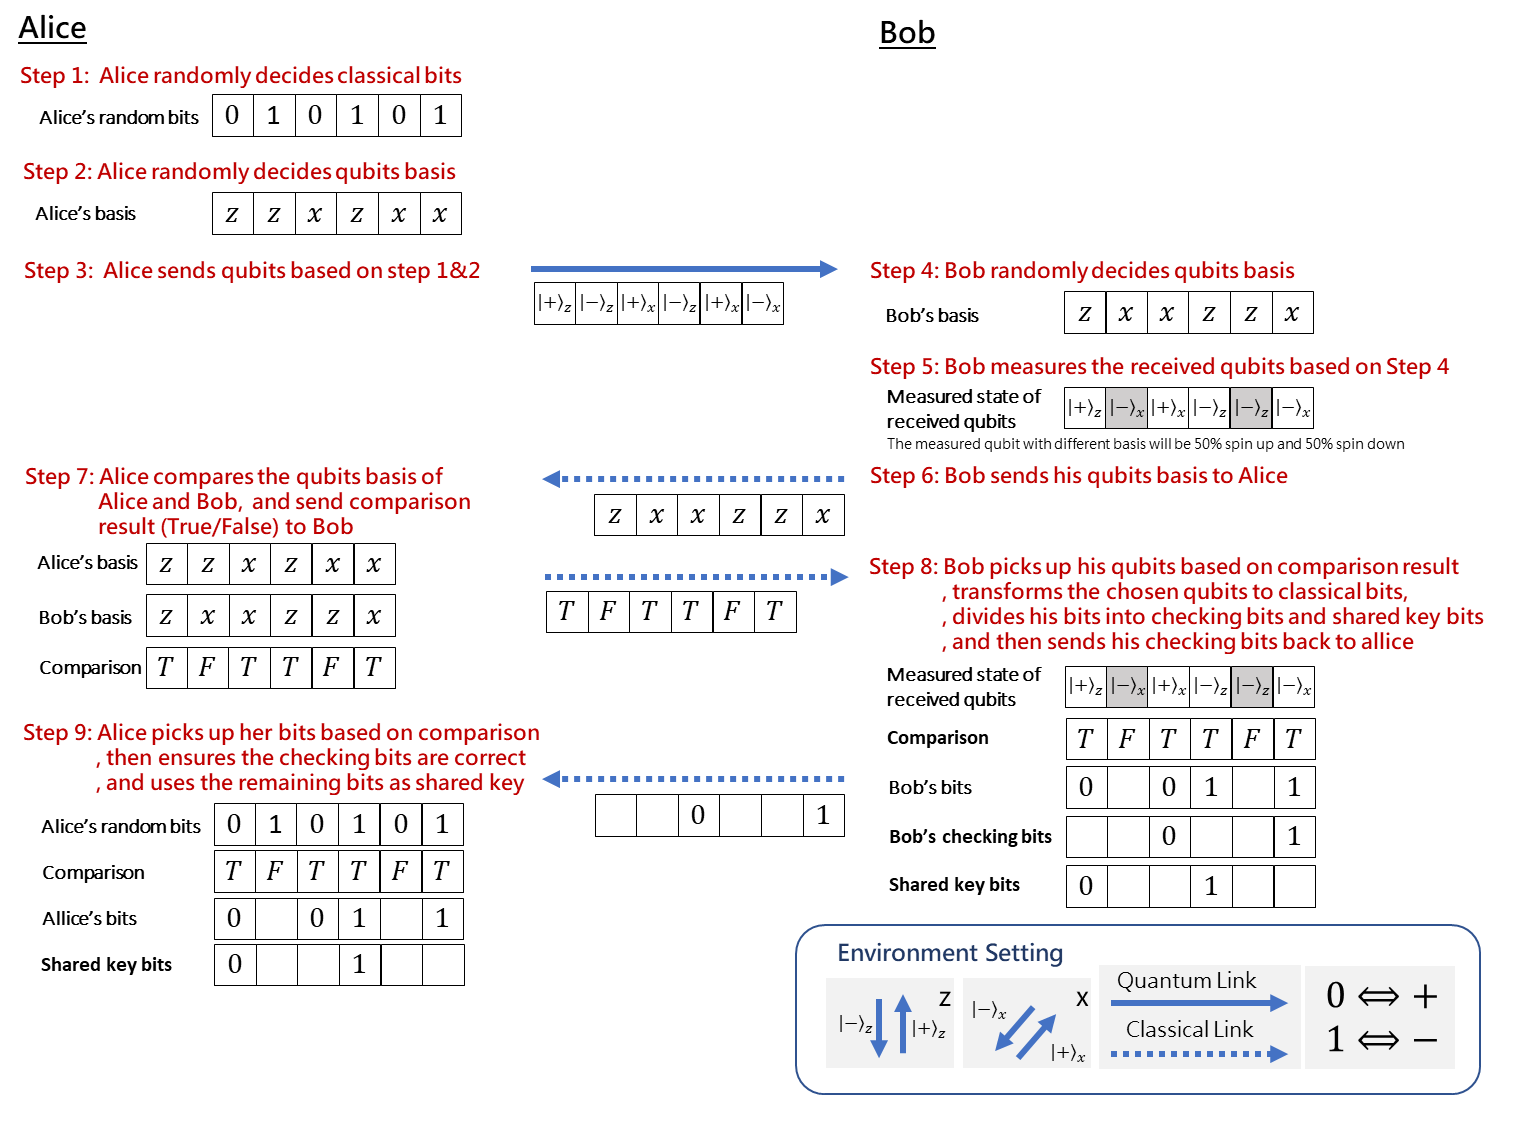

## QKD Code

In [6]:
# 1. import pytorch and numpy

import random
import torch
torch_seed=23
torch.manual_seed(torch_seed)
torch.cuda.manual_seed(torch_seed)
torch.cuda.manual_seed_all(torch_seed)

random.seed(6)
np.random.seed(8)

num_of_bit=6

# step 1: Allice decide key randomly
Alice_key_table=np.random.choice(2, num_of_bit)
print("\n# step 1: Alice_key_table: ",Alice_key_table)

# step 2: Allice decide quantum basis randomly
basis = ["z", "x"]
# choose three random sample with replacement to including repetition
Alice_q_basis = random.choices(basis, k=num_of_bit)
print("\n# step 2: Alice_q_basis: ",Alice_q_basis)


# step 3: Allice send 6 quantum bit without sending quantum basis
print(f"\n# Step 3: Allice send qbit  (0=>spin up, 1=> spin down):")
allice_send_qubit_list=[]
for i in range(num_of_bit):
  #qubit=alice_q_circuit(Alice_key_table[i],Alice_q_basis[i])
  qubit=init_qubit()
  if (Alice_q_basis[i]=="z"):
    if (Alice_key_table[i]==0):
      qubit=g_rot_m( init_qubit(0),0,0)
    elif (Alice_key_table[i]==1):
      qubit=g_rot_m( init_qubit(0),0,np.pi*2.0/2.0)
    pass
  elif(Alice_q_basis[i]=="x"):
    # 1. use hadamard gate to transfrom to Sx basis from Sz basis
    qubit=g_h(qubit)
    if (Alice_key_table[i]==0):
      qubit=g_rot_m( init_qubit(0),0,np.pi*1.0/2.0)
    elif (Alice_key_table[i]==1):
      qubit=g_rot_m( init_qubit(0),0,np.pi*7.0/2.0)   
    pass
  pass
  print(f"{i}-th qbit: basis => {Alice_q_basis}, spin => {Alice_key_table}, state => {qubit}")
  allice_send_qubit_list.append(qubit)
pass


# step 4: Bob decide quantum basis randomly
basis = ["z", "x"]
# choose three random sample with replacement to including repetition
Bob_q_basis = random.choices(basis, k=num_of_bit)
print("\n# step 4: Bob_q_basis: ",Bob_q_basis)

# step 5: Bob measure Allice's quantum basis based on Bob's quantum basis
Bob_measured_qbit=np.array([])
for i in range(num_of_bit):
  _m_bit=None
  if Bob_q_basis[i]=="z":
   _m_bit= sample(prob_z(allice_send_qubit_list[i]))
  else:
   _m_bit= sample(prob_x(allice_send_qubit_list[i]))
  pass
  Bob_measured_qbit=np.append(Bob_measured_qbit,_m_bit)
pass
print("\n# step 5: Bob measured qbit (0=>spin up, 1=> spin down):",Bob_measured_qbit)

# step 6: Bob sends Bob's basis to Allice
print("\n# step 6: Bob sends Bob's basis to Allice:",Bob_q_basis)

# step 7: Allice compares Allice's basis and Bob basis and send back comparsion to Bob
print("\n# step 7: Allice compares Allice's basis and Bob basis")
print("Alice's basis: \t", Alice_q_basis)
print("Bob's basis: \t", Bob_q_basis)
basis_comparison=[]
for i in range(num_of_bit):
 if Alice_q_basis[i]==Bob_q_basis[i]:
   basis_comparison.append(True)
 else:
   basis_comparison.append(False)
 pass
pass
print("Comparison: \t",basis_comparison)

#Step 8: Bob picks up avaiable qbits, then separates them into checking bits and key bits, and sends the checking bits to AliceBob_checking_bit
print("\n# Step 8: Bob picks up avaiable qbits, then separates them into checking bits and key bits, and sends the checking bits to AliceBob_checking_bit")
Bob_available_bit={}
for i in range(num_of_bit):
 if (basis_comparison[i]==True):
  Bob_available_bit[i]=Bob_measured_qbit[i]
 pass
pass
print("Bob's Available bit: \t",Bob_available_bit)

# pick the 1st, 4th bit as checking bit
Bob_checking_bit={}
Bob_checking_bit[1]=Bob_available_bit[1]
Bob_checking_bit[4]=Bob_available_bit[4]
print("Bob Checking bit: \t",Bob_checking_bit)

# pick the 2nd, 5th bit as key bit
Bob_key_bit={}
Bob_key_bit[2]=Bob_available_bit[2]
Bob_key_bit[5]=Bob_available_bit[5]
print("Bob Key bit: \t\t",Bob_key_bit)

# send back checking bit to Alice
print("Bob sends back Checking bit to Alice: \t",Bob_checking_bit)

# Step 9: Allice check the checking bit from Bob
print("\n# Step 9: Allice check the checking bit from Bob")

is_checking_bit_fine=True
for key, value in Bob_checking_bit.items():
 if Alice_key_table[key]!=Bob_checking_bit[key]:
   is_checking_bit_fine=False
 pass
 print(f"Alice_key_table[{key}]={Alice_key_table[key]} vs Bob_checking_bit[{key}]={Bob_checking_bit[key]} == {Alice_key_table[key]==Bob_checking_bit[key]} ")
pass

Alice_key_bit={}
if is_checking_bit_fine:
  print("Allice's checking result is pass.")

  # get alice key bit
  for i in range(num_of_bit):
    if (basis_comparison[i]==True):
      Alice_key_bit[i]=Alice_key_table[i]
    pass
  pass
  for key, value in Bob_checking_bit.items():
   del Alice_key_bit[key]
  pass
  print("Allice's key bit is:", Alice_key_bit)
else:
  print("Allice's checking result is not pass.")
pass


# step 1: Alice_key_table:  [1 0 1 1 1 0]

# step 2: Alice_q_basis:  ['x', 'x', 'z', 'z', 'z', 'x']

# Step 3: Allice send qbit  (0=>spin up, 1=> spin down):
0-th qbit: basis => ['x', 'x', 'z', 'z', 'z', 'x'], spin => [1 0 1 1 1 0], state => tensor([ 0.7071+0.j, -0.7071+0.j])
1-th qbit: basis => ['x', 'x', 'z', 'z', 'z', 'x'], spin => [1 0 1 1 1 0], state => tensor([0.7071+0.j, 0.7071+0.j])
2-th qbit: basis => ['x', 'x', 'z', 'z', 'z', 'x'], spin => [1 0 1 1 1 0], state => tensor([    -0.0000+0.j,      1.0000+0.j])
3-th qbit: basis => ['x', 'x', 'z', 'z', 'z', 'x'], spin => [1 0 1 1 1 0], state => tensor([    -0.0000+0.j,      1.0000+0.j])
4-th qbit: basis => ['x', 'x', 'z', 'z', 'z', 'x'], spin => [1 0 1 1 1 0], state => tensor([    -0.0000+0.j,      1.0000+0.j])
5-th qbit: basis => ['x', 'x', 'z', 'z', 'z', 'x'], spin => [1 0 1 1 1 0], state => tensor([0.7071+0.j, 0.7071+0.j])

# step 4: Bob_q_basis:  ['z', 'x', 'z', 'x', 'z', 'x']

# step 5: Bob measured qbit (0=>spin up, 1=> spin 

# Example 3 in Section 5.B: Distributed Quantum Computing

## DQC Procedure

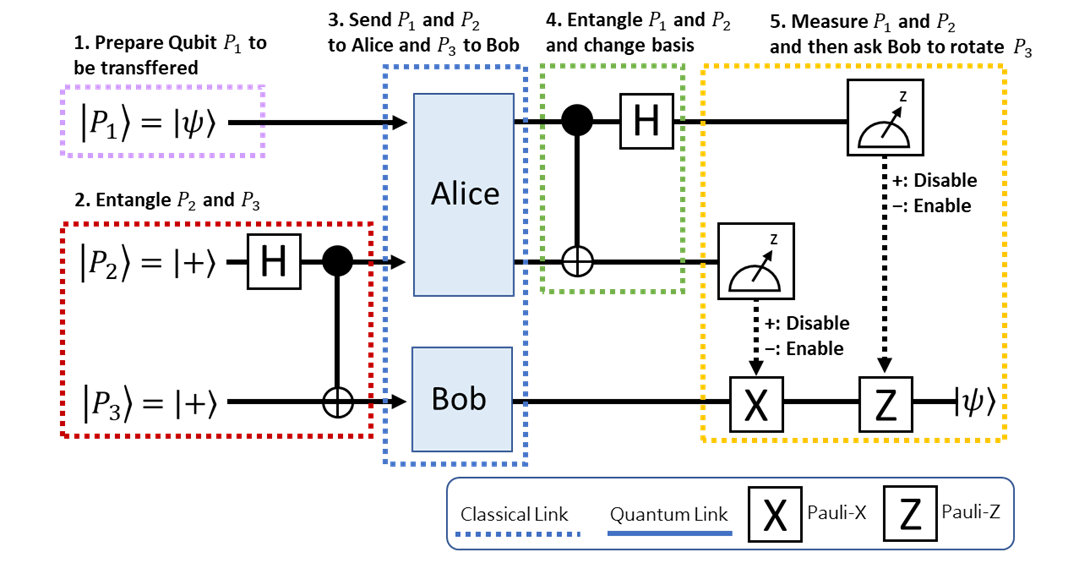

## DQC Code

### Case 1: Measurement of P1 is up, P2 is up

In [7]:
####################
# Step 1: Prepare P1
phi=np.pi/3.0
theta=np.pi*2.0/3.0
q_state=g_rot_m(init_qubit(0), 0, np.pi*1.0/2.0)
P1=g_rot_m(q_state, phi, theta)
print(f"\n# Step 1: Prepare P1")
print(f"P1 quantum state: {P1} \nP1 probability: {prob(P1)}")

####################
# Step 2: Entangle P1(+) and P2(+)

P2=init_qubit(spin=0)
P3=init_qubit(spin=0)

P2=g_h(P2)
r2=reg_2(P2,P3).reshape(4)
result1=g_cnot(r2)

print(f"\n# Step 2: Entangle P1(+) and P2(+)")
print(f"Entanglement of P1(+) and P2(+): {result1}")

####################
# Step 3: Send P1, P2 to Alice, and Send P3 to Bob
Alice_P1=P1
Alice_P2=result1
Bob_P3=result1
print("\n# Step 3: Send P1, P2 to Alice, and Send P3 to Bob")
print(f"Alice P1: {Alice_P1}")
print(f"Alice P2: {Alice_P2}")
print(f"Bob P3: {Bob_P3}")



####################
# Step 4: Entangle P1 and P2, and change basis

print("\n# Step 4: Entangle P1 and P2, and change basis")

result2=reg_2(Alice_P1,Alice_P2).reshape(4,2)
# cnot
q_state=torch.tensor(np.ones(16), dtype=torch.cfloat)
q_state=q_state.view(4,4)  

q_state[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[0][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[0][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[0][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

q_state[1][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[1][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[1][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[1][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

q_state[2][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[2][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[2][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[2][3]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

q_state[3][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[3][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[3][2]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[3][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

result3=torch.tensor(np.ones(8), dtype=torch.cfloat)
result3=result3.view(4,2)  
result3[0]=q_state[0][0]*result2[0]+q_state[0][1]*result2[1]+q_state[0][2]*result2[2]+q_state[0][3]*result2[3]
result3[1]=q_state[1][0]*result2[0]+q_state[1][1]*result2[1]+q_state[1][2]*result2[2]+q_state[1][3]*result2[3]
result3[2]=q_state[2][0]*result2[0]+q_state[2][1]*result2[1]+q_state[2][2]*result2[2]+q_state[2][3]*result2[3]
result3[3]=q_state[3][0]*result2[0]+q_state[3][1]*result2[1]+q_state[3][2]*result2[2]+q_state[3][3]*result2[3]

print(f"\n ## Step 4.1. Entangle P1 and P2 (Eq. (33)) : \n", result3)

#qml.Hadamard(wires=[0])
############################################
# EQ 34: h gate
g_h2=torch.tensor(np.ones(4), dtype=torch.cfloat) 
g_h2=g_h2.view(2,2)  

g_h2[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2[0][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2[1][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2[1][1]=torch.complex(torch.tensor(-1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2=g_h2*torch.sqrt(torch.tensor(1.0/2.0))

result3=result3.reshape(2,4)
eq34=torch.tensor(np.ones(8), dtype=torch.cfloat)
eq34=eq34.view(2,4)
eq34[0]=g_h2[0][0]*result3[0]+g_h2[0][1]*result3[1]
eq34[1]=g_h2[1][0]*result3[0]+g_h2[1][1]*result3[1]

eq34=eq34.reshape(8)

print(f"\n ## Step 4.2. Change basis (Eq. (34)) : \n{eq34}")


####################
# Step 5: Measure P1 and P2, and quantum state of P1 is transferred to P3

print("\n# Step 5: Measure P1 and P2, and quantum state of P1 is transferred to P3")

print("\n ## Case 5.1: Measurement of P1 is up, P2 is up")

P1_m=init_qubit(spin=0)
P2_m=init_qubit(spin=0)
P1_2_m=reg_2(P1_m,P2_m).reshape(4)
# print("P1_2", P1_2_m)

P3_m=torch.tensor(np.zeros(2), dtype=torch.cfloat) 
eq34=eq34.reshape(4,2)
P3_m=P1_2_m[0]*eq34[0]+P1_2_m[1]*eq34[1]+P1_2_m[2]*eq34[2]+P1_2_m[3]*eq34[3]

divisor = torch.conj(eq34.reshape(4,2))
divisor[0] = divisor[0]*P1_2_m.T.T[0]
divisor[1] = divisor[1]*P1_2_m.T.T[1]
divisor[2] = divisor[2]*P1_2_m.T.T[2]
divisor[3] = divisor[3]*P1_2_m.T.T[3]

divisor[0] = divisor[0]*P1_2_m.T[0]
divisor[1] = divisor[1]*P1_2_m.T[1]
divisor[2] = divisor[2]*P1_2_m.T[2]
divisor[3] = divisor[3]*P1_2_m.T[3]

divisor[0] = divisor[0]*P1_2_m[0]
divisor[1] = divisor[1]*P1_2_m[1]
divisor[2] = divisor[2]*P1_2_m[2]
divisor[3] = divisor[3]*P1_2_m[3]

divisor[0] = divisor[0]*P1_2_m.T[0]
divisor[1] = divisor[1]*P1_2_m.T[1]
divisor[2] = divisor[2]*P1_2_m.T[2]
divisor[3] = divisor[3]*P1_2_m.T[3]

divisor[0] = divisor[0]*eq34.reshape(4,2)[0]
divisor[1] = divisor[1]*eq34.reshape(4,2)[1]
divisor[2] = divisor[2]*eq34.reshape(4,2)[2]
divisor[3] = divisor[3]*eq34.reshape(4,2)[3]
divisor=torch.sqrt(torch.sum(divisor))
# print("divisor: ", divisor)
P3_m=P3_m/divisor

if torch.equal(P2_m,init_qubit(spin=1)):
  P3_m=g_x(P3_m)
pass
if torch.equal(P1_m,init_qubit(spin=1)):
  P3_m=g_z(P3_m)
pass
print("\n P3_m", P3_m)





# Step 1: Prepare P1
P1 quantum state: tensor([0.6597+0.5303j, 0.4356-0.3062j]) 
P1 probability: tensor([0.7165, 0.2835])

# Step 2: Entangle P1(+) and P2(+)
Entanglement of P1(+) and P2(+): tensor([0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j])

# Step 3: Send P1, P2 to Alice, and Send P3 to Bob
Alice P1: tensor([0.6597+0.5303j, 0.4356-0.3062j])
Alice P2: tensor([0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j])
Bob P3: tensor([0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j])

# Step 4: Entangle P1 and P2, and change basis

 ## Step 4.1. Entangle P1 and P2 (Eq. (33)) : 
 tensor([[0.4665+0.3750j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.4665+0.3750j],
        [0.0000+0.0000j, 0.3080-0.2165j],
        [0.3080-0.2165j, 0.0000+0.0000j]])

 ## Step 4.2. Change basis (Eq. (34)) : 
tensor([ 0.3299+0.2652j,  0.2178-0.1531j,  0.2178-0.1531j,  0.3299+0.2652j,  0.3299+0.2652j, -0.2178+0.1531j, -0.2178+0.1531j,  0.3299+0.2652j])

# Step 5: Measure P1 and P2, and quantum state of P1 is transf

### Case 2: Measurement of P1 is up, P2 is down

In [8]:

####################
# Step 1: Prepare P1
phi=np.pi/3.0
theta=np.pi*2.0/3.0
q_state=g_rot_m(init_qubit(0), 0, np.pi*1.0/2.0)
P1=g_rot_m(q_state, phi, theta)
print(f"\n# Step 1: Prepare P1")
print(f"P1 quantum state: {P1} \nP1 probability: {prob(P1)}")

####################
# Step 2: Entangle P1(+) and P2(+)

P2=init_qubit(spin=0)
P3=init_qubit(spin=0)

P2=g_h(P2)
r2=reg_2(P2,P3).reshape(4)
result1=g_cnot(r2)

print(f"\n# Step 2: Entangle P1(+) and P2(+)")
print(f"Entanglement of P1(+) and P2(+): {result1}")

####################
# Step 3: Send P1, P2 to Alice, and Send P3 to Bob
Alice_P1=P1
Alice_P2=result1
Bob_P3=result1
print("\n# Step 3: Send P1, P2 to Alice, and Send P3 to Bob")
print(f"Alice P1: {Alice_P1}")
print(f"Alice P2: {Alice_P2}")
print(f"Bob P3: {Bob_P3}")



####################
# Step 4: Entangle P1 and P2, and change basis

print("\n# Step 4: Entangle P1 and P2, and change basis")

result2=reg_2(Alice_P1,Alice_P2).reshape(4,2)
# cnot
q_state=torch.tensor(np.ones(16), dtype=torch.cfloat)
q_state=q_state.view(4,4)  

q_state[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[0][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[0][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[0][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

q_state[1][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[1][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[1][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[1][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

q_state[2][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[2][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[2][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[2][3]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

q_state[3][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[3][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[3][2]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[3][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

result3=torch.tensor(np.ones(8), dtype=torch.cfloat)
result3=result3.view(4,2)  
result3[0]=q_state[0][0]*result2[0]+q_state[0][1]*result2[1]+q_state[0][2]*result2[2]+q_state[0][3]*result2[3]
result3[1]=q_state[1][0]*result2[0]+q_state[1][1]*result2[1]+q_state[1][2]*result2[2]+q_state[1][3]*result2[3]
result3[2]=q_state[2][0]*result2[0]+q_state[2][1]*result2[1]+q_state[2][2]*result2[2]+q_state[2][3]*result2[3]
result3[3]=q_state[3][0]*result2[0]+q_state[3][1]*result2[1]+q_state[3][2]*result2[2]+q_state[3][3]*result2[3]

print(f"\n ## Step 4.1. Entangle P1 and P2 (Eq. (33)) : \n", result3)

#qml.Hadamard(wires=[0])
############################################
# EQ 34: h gate
g_h2=torch.tensor(np.ones(4), dtype=torch.cfloat) 
g_h2=g_h2.view(2,2)  

g_h2[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2[0][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2[1][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2[1][1]=torch.complex(torch.tensor(-1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2=g_h2*torch.sqrt(torch.tensor(1.0/2.0))

result3=result3.reshape(2,4)
eq34=torch.tensor(np.ones(8), dtype=torch.cfloat)
eq34=eq34.view(2,4)
eq34[0]=g_h2[0][0]*result3[0]+g_h2[0][1]*result3[1]
eq34[1]=g_h2[1][0]*result3[0]+g_h2[1][1]*result3[1]

eq34=eq34.reshape(8)

print(f"\n ## Step 4.2. Change basis (Eq. (34)) : \n{eq34}")


####################
# Step 5: Measure P1 and P2, and quantum state of P1 is transferred to P3

print("\n# Step 5: Measure P1 and P2, and quantum state of P1 is transferred to P3")

print("\n ## Case 5.2: Measurement of P1 is up, P2 is down")

P1_m=init_qubit(spin=0)
P2_m=init_qubit(spin=1)
P1_2_m=reg_2(P1_m,P2_m).reshape(4)
# print("P1_2", P1_2_m)

P3_m=torch.tensor(np.zeros(2), dtype=torch.cfloat) 
eq34=eq34.reshape(4,2)
P3_m=P1_2_m[0]*eq34[0]+P1_2_m[1]*eq34[1]+P1_2_m[2]*eq34[2]+P1_2_m[3]*eq34[3]

divisor = torch.conj(eq34.reshape(4,2))
divisor[0] = divisor[0]*P1_2_m.T.T[0]
divisor[1] = divisor[1]*P1_2_m.T.T[1]
divisor[2] = divisor[2]*P1_2_m.T.T[2]
divisor[3] = divisor[3]*P1_2_m.T.T[3]

divisor[0] = divisor[0]*P1_2_m.T[0]
divisor[1] = divisor[1]*P1_2_m.T[1]
divisor[2] = divisor[2]*P1_2_m.T[2]
divisor[3] = divisor[3]*P1_2_m.T[3]

divisor[0] = divisor[0]*P1_2_m[0]
divisor[1] = divisor[1]*P1_2_m[1]
divisor[2] = divisor[2]*P1_2_m[2]
divisor[3] = divisor[3]*P1_2_m[3]

divisor[0] = divisor[0]*P1_2_m.T[0]
divisor[1] = divisor[1]*P1_2_m.T[1]
divisor[2] = divisor[2]*P1_2_m.T[2]
divisor[3] = divisor[3]*P1_2_m.T[3]

divisor[0] = divisor[0]*eq34.reshape(4,2)[0]
divisor[1] = divisor[1]*eq34.reshape(4,2)[1]
divisor[2] = divisor[2]*eq34.reshape(4,2)[2]
divisor[3] = divisor[3]*eq34.reshape(4,2)[3]
divisor=torch.sqrt(torch.sum(divisor))
# print("divisor: ", divisor)
P3_m=P3_m/divisor

if torch.equal(P2_m,init_qubit(spin=1)):
  P3_m=g_x(P3_m)
pass
if torch.equal(P1_m,init_qubit(spin=1)):
  P3_m=g_z(P3_m)
pass
print("\n P3_m", P3_m)



# Step 1: Prepare P1
P1 quantum state: tensor([0.6597+0.5303j, 0.4356-0.3062j]) 
P1 probability: tensor([0.7165, 0.2835])

# Step 2: Entangle P1(+) and P2(+)
Entanglement of P1(+) and P2(+): tensor([0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j])

# Step 3: Send P1, P2 to Alice, and Send P3 to Bob
Alice P1: tensor([0.6597+0.5303j, 0.4356-0.3062j])
Alice P2: tensor([0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j])
Bob P3: tensor([0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j])

# Step 4: Entangle P1 and P2, and change basis

 ## Step 4.1. Entangle P1 and P2 (Eq. (33)) : 
 tensor([[0.4665+0.3750j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.4665+0.3750j],
        [0.0000+0.0000j, 0.3080-0.2165j],
        [0.3080-0.2165j, 0.0000+0.0000j]])

 ## Step 4.2. Change basis (Eq. (34)) : 
tensor([ 0.3299+0.2652j,  0.2178-0.1531j,  0.2178-0.1531j,  0.3299+0.2652j,  0.3299+0.2652j, -0.2178+0.1531j, -0.2178+0.1531j,  0.3299+0.2652j])

# Step 5: Measure P1 and P2, and quantum state of P1 is transf

### Case 3: Measurement of P1 is down, P2 is up

In [9]:


####################
# Step 1: Prepare P1
phi=np.pi/3.0
theta=np.pi*2.0/3.0
q_state=g_rot_m(init_qubit(0), 0, np.pi*1.0/2.0)
P1=g_rot_m(q_state, phi, theta)
print(f"\n# Step 1: Prepare P1")
print(f"P1 quantum state: {P1} \nP1 probability: {prob(P1)}")

####################
# Step 2: Entangle P1(+) and P2(+)

P2=init_qubit(spin=0)
P3=init_qubit(spin=0)

P2=g_h(P2)
r2=reg_2(P2,P3).reshape(4)
result1=g_cnot(r2)

print(f"\n# Step 2: Entangle P1(+) and P2(+)")
print(f"Entanglement of P1(+) and P2(+): {result1}")

####################
# Step 3: Send P1, P2 to Alice, and Send P3 to Bob
Alice_P1=P1
Alice_P2=result1
Bob_P3=result1
print("\n# Step 3: Send P1, P2 to Alice, and Send P3 to Bob")
print(f"Alice P1: {Alice_P1}")
print(f"Alice P2: {Alice_P2}")
print(f"Bob P3: {Bob_P3}")



####################
# Step 4: Entangle P1 and P2, and change basis

print("\n# Step 4: Entangle P1 and P2, and change basis")

result2=reg_2(Alice_P1,Alice_P2).reshape(4,2)
# cnot
q_state=torch.tensor(np.ones(16), dtype=torch.cfloat)
q_state=q_state.view(4,4)  

q_state[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[0][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[0][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[0][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

q_state[1][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[1][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[1][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[1][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

q_state[2][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[2][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[2][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[2][3]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

q_state[3][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[3][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[3][2]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[3][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

result3=torch.tensor(np.ones(8), dtype=torch.cfloat)
result3=result3.view(4,2)  
result3[0]=q_state[0][0]*result2[0]+q_state[0][1]*result2[1]+q_state[0][2]*result2[2]+q_state[0][3]*result2[3]
result3[1]=q_state[1][0]*result2[0]+q_state[1][1]*result2[1]+q_state[1][2]*result2[2]+q_state[1][3]*result2[3]
result3[2]=q_state[2][0]*result2[0]+q_state[2][1]*result2[1]+q_state[2][2]*result2[2]+q_state[2][3]*result2[3]
result3[3]=q_state[3][0]*result2[0]+q_state[3][1]*result2[1]+q_state[3][2]*result2[2]+q_state[3][3]*result2[3]

print(f"\n ## Step 4.1. Entangle P1 and P2 (Eq. (33)) : \n", result3)

#qml.Hadamard(wires=[0])
############################################
# EQ 34: h gate
g_h2=torch.tensor(np.ones(4), dtype=torch.cfloat) 
g_h2=g_h2.view(2,2)  

g_h2[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2[0][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2[1][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2[1][1]=torch.complex(torch.tensor(-1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2=g_h2*torch.sqrt(torch.tensor(1.0/2.0))

result3=result3.reshape(2,4)
eq34=torch.tensor(np.ones(8), dtype=torch.cfloat)
eq34=eq34.view(2,4)
eq34[0]=g_h2[0][0]*result3[0]+g_h2[0][1]*result3[1]
eq34[1]=g_h2[1][0]*result3[0]+g_h2[1][1]*result3[1]

eq34=eq34.reshape(8)

print(f"\n ## Step 4.2. Change basis (Eq. (34)) : \n{eq34}")


####################
# Step 5: Measure P1 and P2, and quantum state of P1 is transferred to P3

print("\n# Step 5: Measure P1 and P2, and quantum state of P1 is transferred to P3")

print("\n ## Case 5.3: Measurement of P1 is down, P2 is up")

P1_m=init_qubit(spin=1)
P2_m=init_qubit(spin=0)
P1_2_m=reg_2(P1_m,P2_m).reshape(4)
# print("P1_2", P1_2_m)

P3_m=torch.tensor(np.zeros(2), dtype=torch.cfloat) 
eq34=eq34.reshape(4,2)
P3_m=P1_2_m[0]*eq34[0]+P1_2_m[1]*eq34[1]+P1_2_m[2]*eq34[2]+P1_2_m[3]*eq34[3]

divisor = torch.conj(eq34.reshape(4,2))
divisor[0] = divisor[0]*P1_2_m.T.T[0]
divisor[1] = divisor[1]*P1_2_m.T.T[1]
divisor[2] = divisor[2]*P1_2_m.T.T[2]
divisor[3] = divisor[3]*P1_2_m.T.T[3]

divisor[0] = divisor[0]*P1_2_m.T[0]
divisor[1] = divisor[1]*P1_2_m.T[1]
divisor[2] = divisor[2]*P1_2_m.T[2]
divisor[3] = divisor[3]*P1_2_m.T[3]

divisor[0] = divisor[0]*P1_2_m[0]
divisor[1] = divisor[1]*P1_2_m[1]
divisor[2] = divisor[2]*P1_2_m[2]
divisor[3] = divisor[3]*P1_2_m[3]

divisor[0] = divisor[0]*P1_2_m.T[0]
divisor[1] = divisor[1]*P1_2_m.T[1]
divisor[2] = divisor[2]*P1_2_m.T[2]
divisor[3] = divisor[3]*P1_2_m.T[3]

divisor[0] = divisor[0]*eq34.reshape(4,2)[0]
divisor[1] = divisor[1]*eq34.reshape(4,2)[1]
divisor[2] = divisor[2]*eq34.reshape(4,2)[2]
divisor[3] = divisor[3]*eq34.reshape(4,2)[3]
divisor=torch.sqrt(torch.sum(divisor))
# print("divisor: ", divisor)
P3_m=P3_m/divisor

if torch.equal(P2_m,init_qubit(spin=1)):
  P3_m=g_x(P3_m)
pass
if torch.equal(P1_m,init_qubit(spin=1)):
  P3_m=g_z(P3_m)
pass
print("\n P3_m", P3_m)



# Step 1: Prepare P1
P1 quantum state: tensor([0.6597+0.5303j, 0.4356-0.3062j]) 
P1 probability: tensor([0.7165, 0.2835])

# Step 2: Entangle P1(+) and P2(+)
Entanglement of P1(+) and P2(+): tensor([0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j])

# Step 3: Send P1, P2 to Alice, and Send P3 to Bob
Alice P1: tensor([0.6597+0.5303j, 0.4356-0.3062j])
Alice P2: tensor([0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j])
Bob P3: tensor([0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j])

# Step 4: Entangle P1 and P2, and change basis

 ## Step 4.1. Entangle P1 and P2 (Eq. (33)) : 
 tensor([[0.4665+0.3750j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.4665+0.3750j],
        [0.0000+0.0000j, 0.3080-0.2165j],
        [0.3080-0.2165j, 0.0000+0.0000j]])

 ## Step 4.2. Change basis (Eq. (34)) : 
tensor([ 0.3299+0.2652j,  0.2178-0.1531j,  0.2178-0.1531j,  0.3299+0.2652j,  0.3299+0.2652j, -0.2178+0.1531j, -0.2178+0.1531j,  0.3299+0.2652j])

# Step 5: Measure P1 and P2, and quantum state of P1 is transf

### Case 4: Measurement of P1 is down, P2 is down

In [10]:

####################
# Step 1: Prepare P1
phi=np.pi/3.0
theta=np.pi*2.0/3.0
q_state=g_rot_m(init_qubit(0), 0, np.pi*1.0/2.0)
P1=g_rot_m(q_state, phi, theta)
print(f"\n# Step 1: Prepare P1")
print(f"P1 quantum state: {P1} \nP1 probability: {prob(P1)}")

####################
# Step 2: Entangle P1(+) and P2(+)

P2=init_qubit(spin=0)
P3=init_qubit(spin=0)

P2=g_h(P2)
r2=reg_2(P2,P3).reshape(4)
result1=g_cnot(r2)

print(f"\n# Step 2: Entangle P1(+) and P2(+)")
print(f"Entanglement of P1(+) and P2(+): {result1}")

####################
# Step 3: Send P1, P2 to Alice, and Send P3 to Bob
Alice_P1=P1
Alice_P2=result1
Bob_P3=result1
print("\n# Step 3: Send P1, P2 to Alice, and Send P3 to Bob")
print(f"Alice P1: {Alice_P1}")
print(f"Alice P2: {Alice_P2}")
print(f"Bob P3: {Bob_P3}")



####################
# Step 4: Entangle P1 and P2, and change basis

print("\n# Step 4: Entangle P1 and P2, and change basis")

result2=reg_2(Alice_P1,Alice_P2).reshape(4,2)
# cnot
q_state=torch.tensor(np.ones(16), dtype=torch.cfloat)
q_state=q_state.view(4,4)  

q_state[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[0][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[0][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[0][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

q_state[1][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[1][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[1][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[1][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

q_state[2][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[2][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[2][2]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[2][3]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

q_state[3][0]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[3][1]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[3][2]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
q_state[3][3]=torch.complex(torch.tensor(0.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))

result3=torch.tensor(np.ones(8), dtype=torch.cfloat)
result3=result3.view(4,2)  
result3[0]=q_state[0][0]*result2[0]+q_state[0][1]*result2[1]+q_state[0][2]*result2[2]+q_state[0][3]*result2[3]
result3[1]=q_state[1][0]*result2[0]+q_state[1][1]*result2[1]+q_state[1][2]*result2[2]+q_state[1][3]*result2[3]
result3[2]=q_state[2][0]*result2[0]+q_state[2][1]*result2[1]+q_state[2][2]*result2[2]+q_state[2][3]*result2[3]
result3[3]=q_state[3][0]*result2[0]+q_state[3][1]*result2[1]+q_state[3][2]*result2[2]+q_state[3][3]*result2[3]

print(f"\n ## Step 4.1. Entangle P1 and P2 (Eq. (33)) : \n", result3)

#qml.Hadamard(wires=[0])
############################################
# EQ 34: h gate
g_h2=torch.tensor(np.ones(4), dtype=torch.cfloat) 
g_h2=g_h2.view(2,2)  

g_h2[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2[0][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2[1][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2[1][1]=torch.complex(torch.tensor(-1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float))
g_h2=g_h2*torch.sqrt(torch.tensor(1.0/2.0))

result3=result3.reshape(2,4)
eq34=torch.tensor(np.ones(8), dtype=torch.cfloat)
eq34=eq34.view(2,4)
eq34[0]=g_h2[0][0]*result3[0]+g_h2[0][1]*result3[1]
eq34[1]=g_h2[1][0]*result3[0]+g_h2[1][1]*result3[1]

eq34=eq34.reshape(8)

print(f"\n ## Step 4.2. Change basis (Eq. (34)) : \n{eq34}")


####################
# Step 5: Measure P1 and P2, and quantum state of P1 is transferred to P3

print("\n# Step 5: Measure P1 and P2, and quantum state of P1 is transferred to P3")

print("\n ## Case 5.4: Measurement of P1 is down, P2 is down")

P1_m=init_qubit(spin=1)
P2_m=init_qubit(spin=1)
P1_2_m=reg_2(P1_m,P2_m).reshape(4)
# print("P1_2", P1_2_m)

P3_m=torch.tensor(np.zeros(2), dtype=torch.cfloat) 
eq34=eq34.reshape(4,2)
P3_m=P1_2_m[0]*eq34[0]+P1_2_m[1]*eq34[1]+P1_2_m[2]*eq34[2]+P1_2_m[3]*eq34[3]

divisor = torch.conj(eq34.reshape(4,2))
divisor[0] = divisor[0]*P1_2_m.T.T[0]
divisor[1] = divisor[1]*P1_2_m.T.T[1]
divisor[2] = divisor[2]*P1_2_m.T.T[2]
divisor[3] = divisor[3]*P1_2_m.T.T[3]

divisor[0] = divisor[0]*P1_2_m.T[0]
divisor[1] = divisor[1]*P1_2_m.T[1]
divisor[2] = divisor[2]*P1_2_m.T[2]
divisor[3] = divisor[3]*P1_2_m.T[3]

divisor[0] = divisor[0]*P1_2_m[0]
divisor[1] = divisor[1]*P1_2_m[1]
divisor[2] = divisor[2]*P1_2_m[2]
divisor[3] = divisor[3]*P1_2_m[3]

divisor[0] = divisor[0]*P1_2_m.T[0]
divisor[1] = divisor[1]*P1_2_m.T[1]
divisor[2] = divisor[2]*P1_2_m.T[2]
divisor[3] = divisor[3]*P1_2_m.T[3]

divisor[0] = divisor[0]*eq34.reshape(4,2)[0]
divisor[1] = divisor[1]*eq34.reshape(4,2)[1]
divisor[2] = divisor[2]*eq34.reshape(4,2)[2]
divisor[3] = divisor[3]*eq34.reshape(4,2)[3]
divisor=torch.sqrt(torch.sum(divisor))
# print("divisor: ", divisor)
P3_m=P3_m/divisor

if torch.equal(P2_m,init_qubit(spin=1)):
  P3_m=g_x(P3_m)
pass
if torch.equal(P1_m,init_qubit(spin=1)):
  P3_m=g_z(P3_m)
pass
print("\n P3_m", P3_m)



# Step 1: Prepare P1
P1 quantum state: tensor([0.6597+0.5303j, 0.4356-0.3062j]) 
P1 probability: tensor([0.7165, 0.2835])

# Step 2: Entangle P1(+) and P2(+)
Entanglement of P1(+) and P2(+): tensor([0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j])

# Step 3: Send P1, P2 to Alice, and Send P3 to Bob
Alice P1: tensor([0.6597+0.5303j, 0.4356-0.3062j])
Alice P2: tensor([0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j])
Bob P3: tensor([0.7071+0.j, 0.0000+0.j, 0.0000+0.j, 0.7071+0.j])

# Step 4: Entangle P1 and P2, and change basis

 ## Step 4.1. Entangle P1 and P2 (Eq. (33)) : 
 tensor([[0.4665+0.3750j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.4665+0.3750j],
        [0.0000+0.0000j, 0.3080-0.2165j],
        [0.3080-0.2165j, 0.0000+0.0000j]])

 ## Step 4.2. Change basis (Eq. (34)) : 
tensor([ 0.3299+0.2652j,  0.2178-0.1531j,  0.2178-0.1531j,  0.3299+0.2652j,  0.3299+0.2652j, -0.2178+0.1531j, -0.2178+0.1531j,  0.3299+0.2652j])

# Step 5: Measure P1 and P2, and quantum state of P1 is transf

# Example 4 in Section 6: Performance of CPU & GPU on Quantum Internet

## Step 1: Using inner product for H-Gate

In [11]:
import numpy as np

# basic qubit operation using numpy
q_gate = np.array([[1,0],[0,1]])
qubits = np.array([[0,1],[1,0],[0,1]])
results=np.inner(q_gate, qubits).T

print(results)


[[0 1]
 [1 0]
 [0 1]]


## Step 2: Measure the performance of cpu

In [12]:
import torch
import numpy as np
import time

chart_x1_data = []
chart_y1_data = []


#device = torch.device("cuda:0")
device = torch.device("cpu")

# build |z>
def init_qubit(n_of_qubits=100):
  
  q_state=torch.tensor(np.full((n_of_qubits,2), ((1+0j,0+0j)), complex), dtype=torch.cfloat).to(device)
  return q_state
pass

def g_h(qubit):
  q_state=torch.tensor(np.ones((2,2)), dtype=torch.cfloat).to(device)
  
  q_state[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float)).to(device)
  q_state[0][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float)).to(device)
  q_state[1][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float)).to(device)
  q_state[1][1]=torch.complex(torch.tensor(-1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float)).to(device)
  q_state=q_state*torch.sqrt(torch.tensor(1.0/2.0))
  
  for i in range(100):
   result=(torch.inner(q_state,qubit))
  pass
  return torch.t(result)
pass


_n_of_qubits=1
for i in range(8):
  # 1. start measure the performance
  start = time.process_time()
  # 2. run h-gate
  resullt=g_h(init_qubit(n_of_qubits=_n_of_qubits))

  # 3. start measure the performance
  end = time.process_time()
  _time=float(end - start)

  # 4. show the results
  print(f"Execution Time：{_n_of_qubits} qubit, {_time:.10f} second" )

  chart_x1_data.append(_n_of_qubits)
  chart_y1_data.append(_time)

  _n_of_qubits=_n_of_qubits*10
pass
#print("eq(20): ",resullt, resullt.size())




Execution Time：1 qubit, 0.0011405210 second
Execution Time：10 qubit, 0.0050281110 second
Execution Time：100 qubit, 0.0026778690 second
Execution Time：1000 qubit, 0.0028730970 second
Execution Time：10000 qubit, 0.0102457520 second
Execution Time：100000 qubit, 0.0897723780 second
Execution Time：1000000 qubit, 0.9107553940 second
Execution Time：10000000 qubit, 8.7105580980 second


## Step 3: Measure the performance of gpu

In [20]:
import torch
import numpy as np
import time

chart_x2_data = []
chart_y2_data = []


device = torch.device("cuda:0")
#device = torch.device("cpu")

# build |z>
def init_qubit(n_of_qubits=100):
  
  q_state=torch.tensor(np.full((n_of_qubits,2), ((1+0j,0+0j)), complex), dtype=torch.cfloat).to(device)
  return q_state
pass

def g_h(qubit):
  q_state=torch.tensor(np.ones((2,2)), dtype=torch.cfloat).to(device)
  
  q_state[0][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float)).to(device)
  q_state[0][1]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float)).to(device)
  q_state[1][0]=torch.complex(torch.tensor(1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float)).to(device)
  q_state[1][1]=torch.complex(torch.tensor(-1.0,dtype=torch.float), torch.tensor(0.0,dtype=torch.float)).to(device)
  q_state=q_state*torch.sqrt(torch.tensor(1.0/2.0))
  
  for i in range(100):
   result=(torch.inner(q_state,qubit))
  pass
  return torch.t(result)
pass


_n_of_qubits=1
for i in range(8):
  # 1. start measure the performance
  start = time.process_time()
  # 2. run h-gate
  resullt=g_h(init_qubit(n_of_qubits=_n_of_qubits))

  # 3. start measure the performance
  end = time.process_time()
  _time=float(end - start)

  # 4. show the results
  print(f"Execution Time：{_n_of_qubits} qubit, {_time:.10f} second" )

  chart_x2_data.append(_n_of_qubits)
  chart_y2_data.append(_time)

  _n_of_qubits=_n_of_qubits*10
pass
#print("eq(20): ",resullt, resullt.size())




Execution Time：1 qubit, 0.0079340840 second
Execution Time：10 qubit, 0.0071318400 second
Execution Time：100 qubit, 0.0068096860 second
Execution Time：1000 qubit, 0.0077631510 second
Execution Time：10000 qubit, 0.0079264340 second
Execution Time：100000 qubit, 0.0100058640 second
Execution Time：1000000 qubit, 0.0311356250 second
Execution Time：10000000 qubit, 0.2580295570 second


## Step 4: Download the log file

In [18]:
import pandas as pd

df = pd.DataFrame (chart_x1_data,columns=['x'])
df['cpu']=chart_y1_data
df['gpu']=chart_y2_data
df.to_csv ('performance.csv', index = False, header=True) 


from google.colab import files
files.download('performance.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Step 5: Install chart library

In [15]:
!pip install pyecharts

     |████████████████████████████████| 135 kB 5.4 MB/s 
     |████████████████████████████████| 130 kB 39.3 MB/s 


## Step 6: Draw Line Chart

In [16]:
import pyecharts.options as opts
from pyecharts.charts import Line
import pandas as pd
import io

# pychart

url1 = 'performance.csv'
fc_df1 = pd.read_csv(url1)

# draw the chart
line=Line()
line.set_global_opts(yaxis_opts=opts.AxisOpts(max_=15, name="Seconds", name_gap=20, name_location="middle"))
line.set_global_opts(xaxis_opts=opts.AxisOpts(name="Num. of Qubits",name_gap=30,  name_location="middle"))
#xaxis_name="num. of qubits", yaxis_name="second"
#line.add_xaxis_name("num")
x_axis=fc_df1['x'].values.astype(str).tolist()

line.add_xaxis(xaxis_data=x_axis  )# fc_df1['x'])
line.add_yaxis( 
        series_name="CPU ",
        y_axis=fc_df1['cpu'],
        label_opts=opts.LabelOpts(is_show=False),
        color='#ff0000') # or color="red" , or color='#ff0090'

line.add_yaxis(
        series_name="GPU ",
        y_axis=fc_df1['gpu'],
        label_opts=opts.LabelOpts(is_show=False),
        color='#0000ff') # or color="red" , or color='#ff0090'


file_name='pytorch_model_1.html'
line.render(file_name)


import IPython
file_name='pytorch_model_1.html'
IPython.display.HTML(filename=file_name)